In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from matplotlib import pyplot as plt
from IPython import display
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 1., 3., 1., 2.])

In [4]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1640, 0.1700, 0.1420, 0.1820, 0.1640, 0.1780])

In [5]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
def use_svg_display():
    display.set_matplotlib_formats('svg')

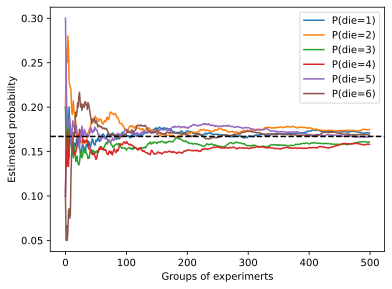

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=('P(die=' + str(i + 1) + ')'))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experimerts')
plt.gca().set_ylabel('Estimated probability')
plt.legend()